# 💰 Cost-Benefit Analysis: Irrigation Systems

This notebook performs comprehensive cost-benefit analysis to evaluate the economic efficiency of different irrigation system types.

**Dataset**: `Irrigation_DS_Clean.xlsx`  
**Objective**: Compare Traditional vs. Drip irrigation systems based on:
- Total costs across all categories
- Cost efficiency (cost per kg of production)
- Production efficiency (output per unit cost)
- Economic viability of each system

---

## 1. Setup and Data Loading

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [3]:
# Load the dataset
df = pd.read_excel('Irrigation_DS_Clean.xlsx')

print("✓ Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nIrrigation System Types: {df['irrigation_system_type'].unique()}")
print(f"Distribution: {df['irrigation_system_type'].value_counts().to_dict()}")

✓ Dataset loaded successfully!

Dataset shape: 30 rows × 55 columns

Irrigation System Types: ['Traditional' 'Drip']
Distribution: {'Traditional': 15, 'Drip': 15}


## 2. Cost Aggregation & Benefit Calculation

In [4]:
# Define cost columns for aggregation
cost_columns = [
    'land_prep_grand_total_cost',
    'nursery_prep_total_cost',
    'cultivation_labor_total_cost',
    'fertilizer_total_cost',
    'production_final_harvest_cost_yer',
    'pest_control_grand_total_cost',
    'water_grand_total_cost'
]

# Calculate total cost per record
df['total_cost'] = df[cost_columns].sum(axis=1)

# Define benefit metric (production quantity)
df['production_kg'] = df['production_quantity_baskets_kg']

# Calculate cost-benefit metrics
# Avoid division by zero
df['cost_per_kg'] = np.where(
    df['production_kg'] > 0,
    df['total_cost'] / df['production_kg'],
    np.nan
)

df['production_efficiency'] = np.where(
    df['total_cost'] > 0,
    df['production_kg'] / df['total_cost'] * 1000,  # kg per 1000 YER
    np.nan
)

print("✓ Cost aggregation and metrics calculated!")
print(f"\nTotal Cost Range: {df['total_cost'].min():,.0f} - {df['total_cost'].max():,.0f} YER")
print(f"Average Total Cost: {df['total_cost'].mean():,.0f} YER")
print(f"\nProduction Range: {df['production_kg'].min():.2f} - {df['production_kg'].max():.2f} kg")
print(f"Average Production: {df['production_kg'].mean():.2f} kg")

✓ Cost aggregation and metrics calculated!

Total Cost Range: 108,680 - 3,824,520 YER
Average Total Cost: 462,974 YER

Production Range: 0.00 - 24000.00 kg
Average Production: 1964.46 kg


In [5]:
# Display sample of cost-benefit data
print("Sample Cost-Benefit Data:")
print("="*100)
display(df[['irrigation_system_type', 'crop_type', 'total_cost', 'production_kg', 
            'cost_per_kg', 'production_efficiency']].head(10))

Sample Cost-Benefit Data:


,irrigation_system_type,crop_type,total_cost,production_kg,cost_per_kg,production_efficiency
0,Traditional,Eggplant,385000.00,120.00,3208.33,0.31
1,Drip,Eggplant,194680.00,0.00,NaN,0.00
2,Traditional,Tomato,955320.00,3200.00,298.54,3.35
3,Drip,Tomato,424000.00,800.00,530.00,1.89
4,Drip,pepper,539480.00,2000.00,269.74,3.71
5,Traditional,pepper,925080.00,860.00,1075.67,0.93
6,Drip,pepper,350900.00,NaN,NaN,NaN
7,Drip,pepper,249000.00,0.00,NaN,0.00
8,Traditional,pepper,288400.00,140.00,2060.00,0.49
9,Traditional,pepper,375000.00,200.00,1875.00,0.53


## 3. Summary Statistics by Irrigation System

In [6]:
# Group by irrigation system type
system_summary = df.groupby('irrigation_system_type').agg({
    'total_cost': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'production_kg': ['mean', 'median', 'std', 'min', 'max'],
    'cost_per_kg': ['mean', 'median', 'std'],
    'production_efficiency': ['mean', 'median', 'std']
}).round(2).T

print("\n" + "="*100)
print("SUMMARY STATISTICS BY IRRIGATION SYSTEM TYPE")
print("="*100)
display(system_summary)


SUMMARY STATISTICS BY IRRIGATION SYSTEM TYPE


irrigation_system_type            Drip  Traditional
total_cost            count      15.00        15.00
                      mean   272126.67    653821.33
                      median 257000.00    375000.00
                      std    106109.54    912005.92
                      min    108680.00    158500.00
                      max    539480.00   3824520.00
production_kg         mean      224.64      3704.29
                      median      0.00       140.00
                      std       554.22      7337.94
                      min         0.00         0.00
                      max      2000.00     24000.00
cost_per_kg           mean      721.55      1337.49
                      median    594.33      1268.00
                      std       497.84      1138.88
production_efficiency mean        0.56         4.33
                      median      0.00         0.60
                      std         1.10        10.05

In [18]:
# Cost breakdown by category for each irrigation system
cost_breakdown = df.groupby('irrigation_system_type')[cost_columns].mean().T

print("\n" + "="*100)
print("AVERAGE COST BREAKDOWN BY CATEGORY (YER)")
print("="*100)
display(cost_breakdown.round(2))

# Calculate percentage contribution of each cost category
cost_breakdown_pct = cost_breakdown.div(cost_breakdown.sum(axis=1), axis=0) * 100
print("\n" + "="*100)
print("COST BREAKDOWN BY CATEGORY (% of Total)")
print("="*100)
display(cost_breakdown_pct.round(1))


AVERAGE COST BREAKDOWN BY CATEGORY (YER)


irrigation_system_type,Drip,Traditional
land_prep_grand_total_cost,21733.33,77200.00
nursery_prep_total_cost,80533.33,75306.67
cultivation_labor_total_cost,33733.33,14140.00
fertilizer_total_cost,25380.00,54566.67
production_final_harvest_cost_yer,19057.14,336242.86
pest_control_grand_total_cost,22133.33,35893.33
water_grand_total_cost,70826.67,82888.00



COST BREAKDOWN BY CATEGORY (% of Total)


irrigation_system_type,Drip,Traditional
land_prep_grand_total_cost,22.00,78.00
nursery_prep_total_cost,51.70,48.30
cultivation_labor_total_cost,70.50,29.50
fertilizer_total_cost,31.70,68.30
production_final_harvest_cost_yer,5.40,94.60
pest_control_grand_total_cost,38.10,61.90
water_grand_total_cost,46.10,53.90


## 4. Visualizations

### 4.1 Total Cost Comparison

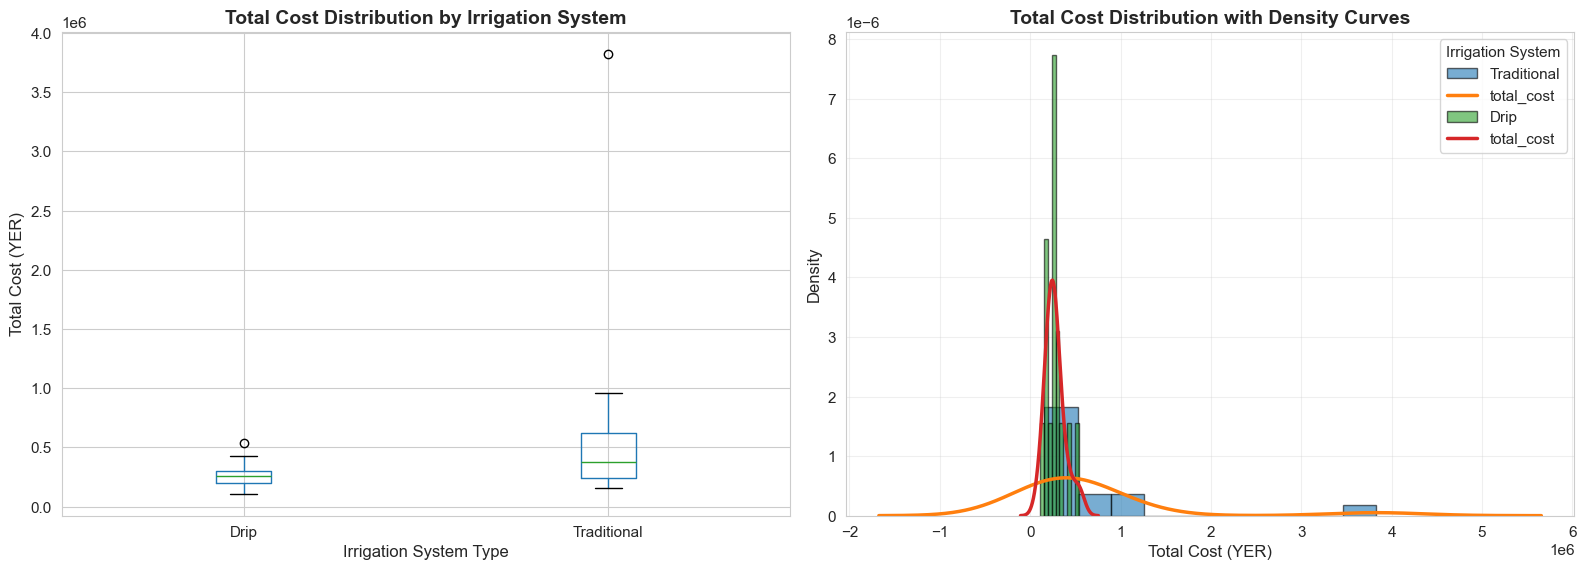

In [8]:
# Distribution of total costs by irrigation system
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
ax1 = axes[0]
df.boxplot(column='total_cost', by='irrigation_system_type', ax=ax1)
ax1.set_title('Total Cost Distribution by Irrigation System', fontsize=14, fontweight='bold')
ax1.set_xlabel('Irrigation System Type', fontsize=12)
ax1.set_ylabel('Total Cost (YER)', fontsize=12)
plt.sca(ax1)
plt.xticks(rotation=0)
plt.suptitle('')  # Remove the automatic title

# Histogram with KDE
ax2 = axes[1]
for system in df['irrigation_system_type'].unique():
    data = df[df['irrigation_system_type'] == system]['total_cost']
    ax2.hist(data, bins=10, alpha=0.6, label=system, density=True, edgecolor='black')
    data.plot(kind='kde', ax=ax2, linewidth=2.5)

ax2.set_title('Total Cost Distribution with Density Curves', fontsize=14, fontweight='bold')
ax2.set_xlabel('Total Cost (YER)', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.legend(title='Irrigation System')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.2 Cost Breakdown by Category

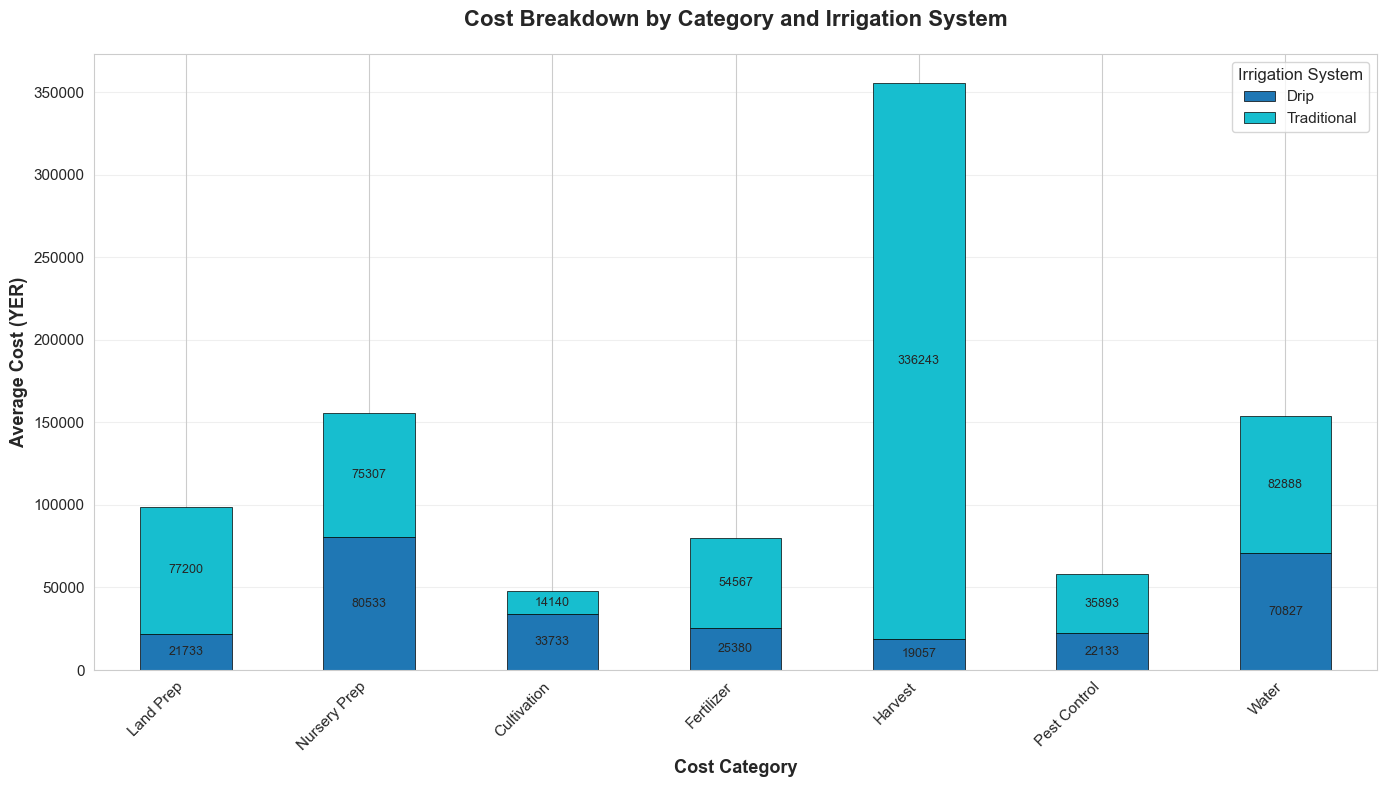

In [9]:
# Stacked bar chart of cost breakdown
fig, ax = plt.subplots(figsize=(14, 8))

# Prepare data for stacked bar
cost_breakdown_display = cost_breakdown.T
cost_breakdown_display.index = [
    'Land Prep', 'Nursery Prep', 'Cultivation', 'Fertilizer',
    'Harvest', 'Pest Control', 'Water'
]

cost_breakdown_display.plot(kind='bar', stacked=True, ax=ax, 
                            colormap='tab10', edgecolor='black', linewidth=0.5)

ax.set_title('Cost Breakdown by Category and Irrigation System', 
            fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Cost Category', fontsize=13, fontweight='bold')
ax.set_ylabel('Average Cost (YER)', fontsize=13, fontweight='bold')
ax.legend(title='Irrigation System', fontsize=11, title_fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center', fontsize=9)

plt.tight_layout()
plt.show()

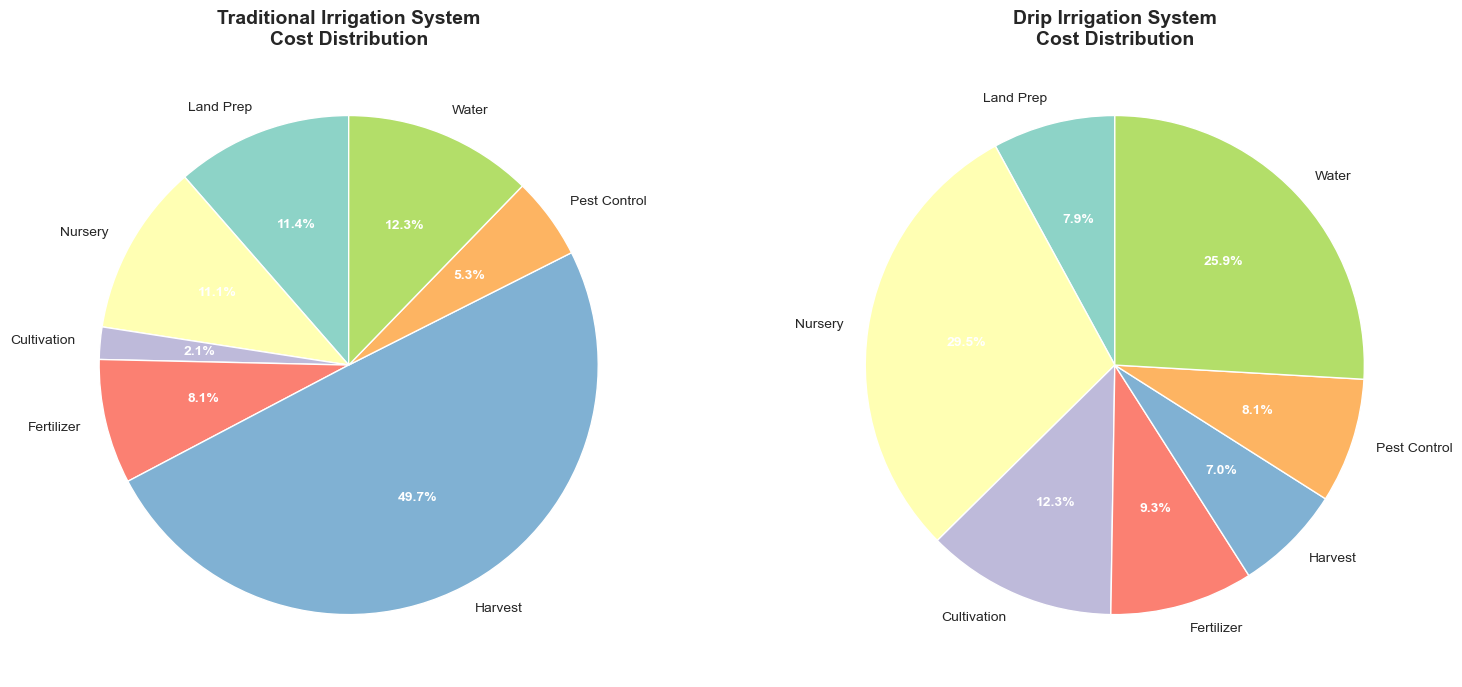

In [10]:
# Pie charts showing cost category proportions for each system
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

systems = df['irrigation_system_type'].unique()
colors = plt.cm.Set3(range(len(cost_columns)))

for idx, system in enumerate(systems):
    ax = axes[idx]
    data = cost_breakdown.loc[system]
    labels = ['Land Prep', 'Nursery', 'Cultivation', 'Fertilizer', 
             'Harvest', 'Pest Control', 'Water']
    
    # Filter out zero values
    non_zero_mask = data > 0
    data_filtered = data[non_zero_mask]
    labels_filtered = [label for label, include in zip(labels, non_zero_mask) if include]
    
    wedges, texts, autotexts = ax.pie(data_filtered, labels=labels_filtered, 
                                       autopct='%1.1f%%', startangle=90,
                                       colors=colors[:len(data_filtered)],
                                       textprops={'fontsize': 10})
    
    # Bold percentage text
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    ax.set_title(f'{system} Irrigation System\nCost Distribution', 
                fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 4.3 Cost vs. Production Analysis

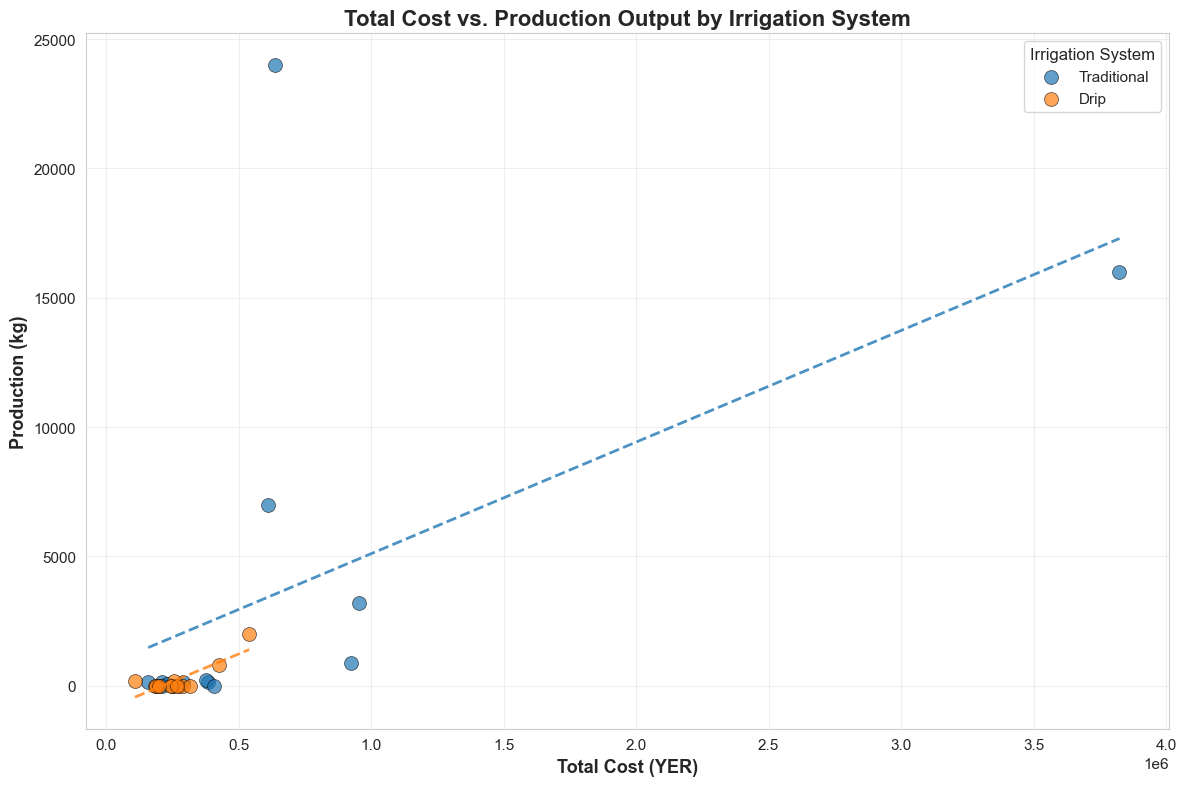

In [11]:
# Scatter plot: Total Cost vs Production
fig, ax = plt.subplots(figsize=(12, 8))

# Plot for each irrigation system
for system in df['irrigation_system_type'].unique():
    data = df[df['irrigation_system_type'] == system]
    ax.scatter(data['total_cost'], data['production_kg'], 
              label=system, alpha=0.7, s=100, edgecolors='black', linewidth=0.5)

# Add trend lines
for system in df['irrigation_system_type'].unique():
    data = df[df['irrigation_system_type'] == system]
    data_clean = data[['total_cost', 'production_kg']].dropna()
    if len(data_clean) > 1:
        z = np.polyfit(data_clean['total_cost'], data_clean['production_kg'], 1)
        p = np.poly1d(z)
        x_trend = np.linspace(data_clean['total_cost'].min(), data_clean['total_cost'].max(), 100)
        ax.plot(x_trend, p(x_trend), linestyle='--', linewidth=2, alpha=0.8)

ax.set_title('Total Cost vs. Production Output by Irrigation System', 
            fontsize=16, fontweight='bold')
ax.set_xlabel('Total Cost (YER)', fontsize=13, fontweight='bold')
ax.set_ylabel('Production (kg)', fontsize=13, fontweight='bold')
ax.legend(title='Irrigation System', fontsize=11, title_fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.4 Cost Efficiency Metrics

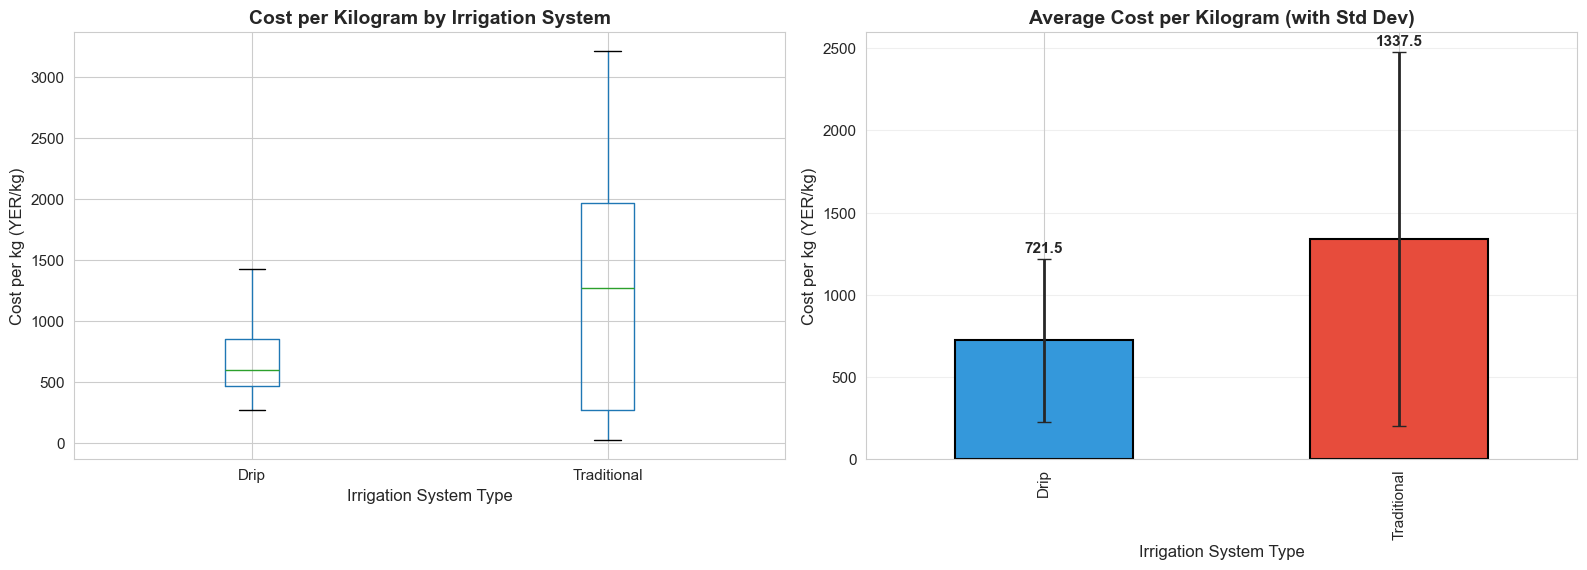

In [12]:
# Cost per kg comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot for cost per kg
ax1 = axes[0]
df_clean = df[df['cost_per_kg'].notna()]
df_clean.boxplot(column='cost_per_kg', by='irrigation_system_type', ax=ax1)
ax1.set_title('Cost per Kilogram by Irrigation System', fontsize=14, fontweight='bold')
ax1.set_xlabel('Irrigation System Type', fontsize=12)
ax1.set_ylabel('Cost per kg (YER/kg)', fontsize=12)
plt.sca(ax1)
plt.xticks(rotation=0)
plt.suptitle('')

# Bar plot with error bars
ax2 = axes[1]
cost_per_kg_summary = df_clean.groupby('irrigation_system_type')['cost_per_kg'].agg(['mean', 'std'])
cost_per_kg_summary['mean'].plot(kind='bar', ax=ax2, yerr=cost_per_kg_summary['std'],
                                 color=['#3498db', '#e74c3c'], edgecolor='black', 
                                 linewidth=1.5, capsize=5, error_kw={'linewidth': 2})
ax2.set_title('Average Cost per Kilogram (with Std Dev)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Irrigation System Type', fontsize=12)
ax2.set_ylabel('Cost per kg (YER/kg)', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0)

# Add value labels
for i, (idx, row) in enumerate(cost_per_kg_summary.iterrows()):
    ax2.text(i, row['mean'] + row['std'] + 20, f"{row['mean']:.1f}", 
            ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

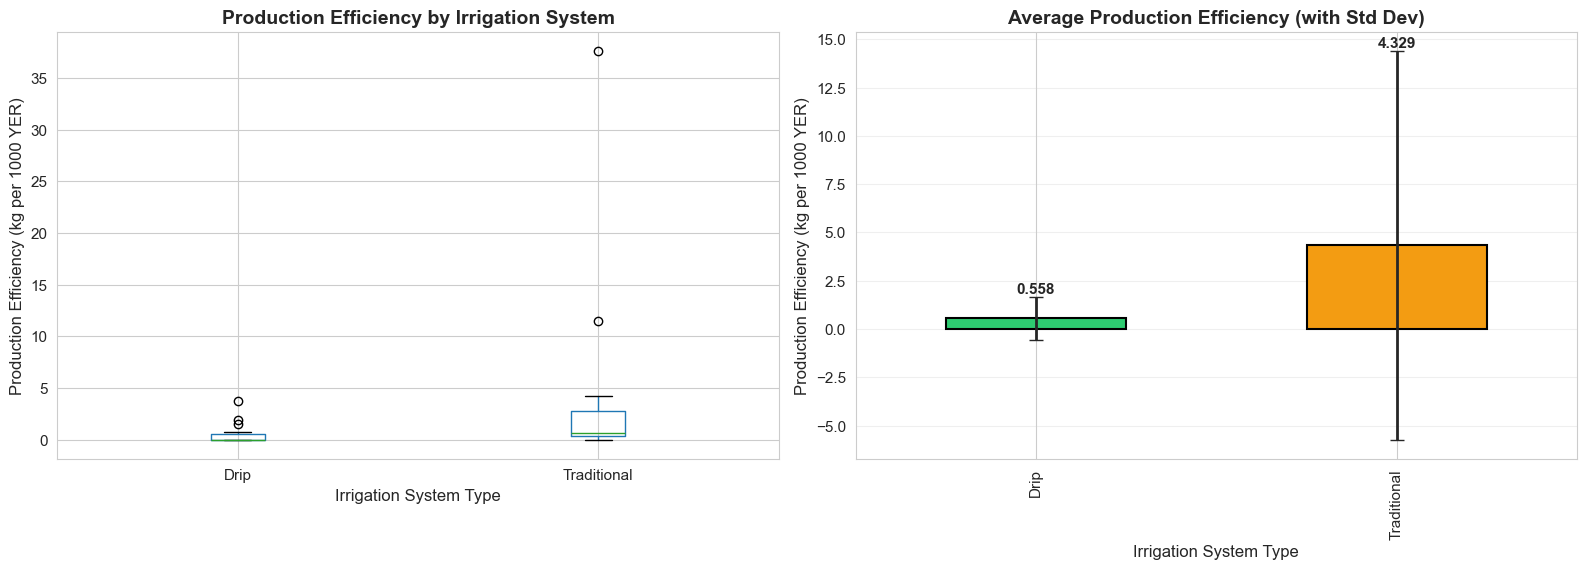

In [13]:
# Production efficiency comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot for production efficiency
ax1 = axes[0]
df_clean = df[df['production_efficiency'].notna()]
df_clean.boxplot(column='production_efficiency', by='irrigation_system_type', ax=ax1)
ax1.set_title('Production Efficiency by Irrigation System', fontsize=14, fontweight='bold')
ax1.set_xlabel('Irrigation System Type', fontsize=12)
ax1.set_ylabel('Production Efficiency (kg per 1000 YER)', fontsize=12)
plt.sca(ax1)
plt.xticks(rotation=0)
plt.suptitle('')

# Bar plot with error bars
ax2 = axes[1]
efficiency_summary = df_clean.groupby('irrigation_system_type')['production_efficiency'].agg(['mean', 'std'])
efficiency_summary['mean'].plot(kind='bar', ax=ax2, yerr=efficiency_summary['std'],
                                color=['#2ecc71', '#f39c12'], edgecolor='black',
                                linewidth=1.5, capsize=5, error_kw={'linewidth': 2})
ax2.set_title('Average Production Efficiency (with Std Dev)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Irrigation System Type', fontsize=12)
ax2.set_ylabel('Production Efficiency (kg per 1000 YER)', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0)

# Add value labels
for i, (idx, row) in enumerate(efficiency_summary.iterrows()):
    ax2.text(i, row['mean'] + row['std'] + 0.02, f"{row['mean']:.3f}",
            ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

### 4.5 Correlation Analysis

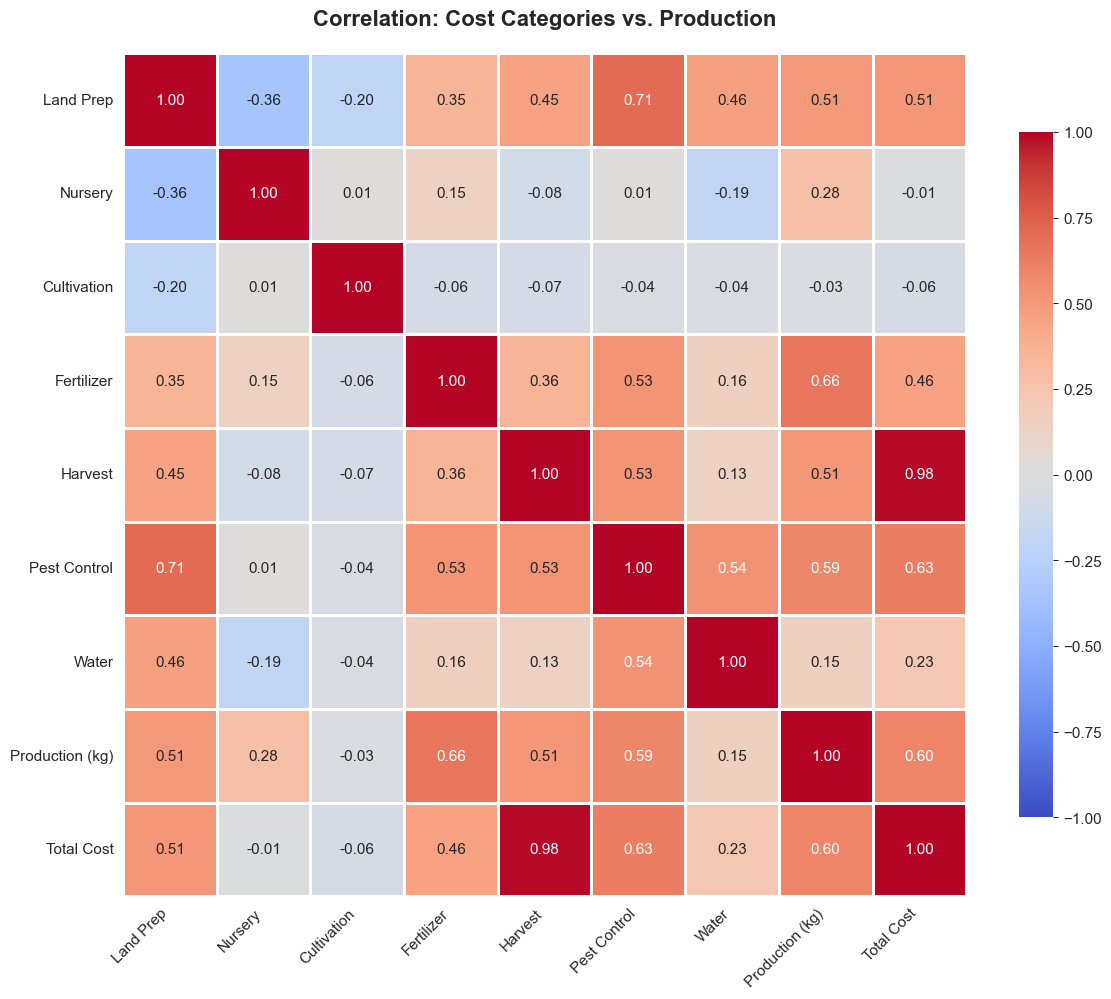

In [14]:
# Correlation heatmap of cost categories and production
correlation_cols = cost_columns + ['production_kg', 'total_cost']
correlation_matrix = df[correlation_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
           center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
           ax=ax, vmin=-1, vmax=1)

# Update labels
labels = ['Land Prep', 'Nursery', 'Cultivation', 'Fertilizer', 
         'Harvest', 'Pest Control', 'Water', 'Production (kg)', 'Total Cost']
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0)

ax.set_title('Correlation: Cost Categories vs. Production', 
            fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

## 5. Statistical Analysis

In [15]:
# Statistical comparison between irrigation systems
print("="*100)
print("STATISTICAL COMPARISON: Traditional vs. Drip Irrigation")
print("="*100)

systems = df['irrigation_system_type'].unique()
if len(systems) == 2:
    traditional = df[df['irrigation_system_type'] == systems[0]]
    drip = df[df['irrigation_system_type'] == systems[1]]
    
    # T-test for total cost
    t_stat_cost, p_value_cost = stats.ttest_ind(traditional['total_cost'], drip['total_cost'])
    print(f"\n1. Total Cost Comparison:")
    print(f"   {systems[0]}: Mean = {traditional['total_cost'].mean():,.2f} YER")
    print(f"   {systems[1]}: Mean = {drip['total_cost'].mean():,.2f} YER")
    print(f"   t-statistic = {t_stat_cost:.4f}, p-value = {p_value_cost:.4f}")
    if p_value_cost < 0.05:
        print(f"   ✓ Statistically significant difference (p < 0.05)")
    else:
        print(f"   ✗ No statistically significant difference (p >= 0.05)")
    
    # T-test for production
    t_stat_prod, p_value_prod = stats.ttest_ind(
        traditional['production_kg'].dropna(), 
        drip['production_kg'].dropna()
    )
    print(f"\n2. Production Comparison:")
    print(f"   {systems[0]}: Mean = {traditional['production_kg'].mean():.2f} kg")
    print(f"   {systems[1]}: Mean = {drip['production_kg'].mean():.2f} kg")
    print(f"   t-statistic = {t_stat_prod:.4f}, p-value = {p_value_prod:.4f}")
    if p_value_prod < 0.05:
        print(f"   ✓ Statistically significant difference (p < 0.05)")
    else:
        print(f"   ✗ No statistically significant difference (p >= 0.05)")
    
    # T-test for cost per kg
    t_stat_cpk, p_value_cpk = stats.ttest_ind(
        traditional['cost_per_kg'].dropna(),
        drip['cost_per_kg'].dropna()
    )
    print(f"\n3. Cost per Kilogram Comparison:")
    print(f"   {systems[0]}: Mean = {traditional['cost_per_kg'].mean():.2f} YER/kg")
    print(f"   {systems[1]}: Mean = {drip['cost_per_kg'].mean():.2f} YER/kg")
    print(f"   t-statistic = {t_stat_cpk:.4f}, p-value = {p_value_cpk:.4f}")
    if p_value_cpk < 0.05:
        print(f"   ✓ Statistically significant difference (p < 0.05)")
    else:
        print(f"   ✗ No statistically significant difference (p >= 0.05)")
    
    # T-test for production efficiency
    t_stat_eff, p_value_eff = stats.ttest_ind(
        traditional['production_efficiency'].dropna(),
        drip['production_efficiency'].dropna()
    )
    print(f"\n4. Production Efficiency Comparison:")
    print(f"   {systems[0]}: Mean = {traditional['production_efficiency'].mean():.4f} kg/1000 YER")
    print(f"   {systems[1]}: Mean = {drip['production_efficiency'].mean():.4f} kg/1000 YER")
    print(f"   t-statistic = {t_stat_eff:.4f}, p-value = {p_value_eff:.4f}")
    if p_value_eff < 0.05:
        print(f"   ✓ Statistically significant difference (p < 0.05)")
    else:
        print(f"   ✗ No statistically significant difference (p >= 0.05)")

print("\n" + "="*100)

STATISTICAL COMPARISON: Traditional vs. Drip Irrigation

1. Total Cost Comparison:
   Traditional: Mean = 653,821.33 YER
   Drip: Mean = 272,126.67 YER
   t-statistic = 1.6101, p-value = 0.1186
   ✗ No statistically significant difference (p >= 0.05)

2. Production Comparison:
   Traditional: Mean = 3704.29 kg
   Drip: Mean = 224.64 kg
   t-statistic = 1.7692, p-value = 0.0886
   ✗ No statistically significant difference (p >= 0.05)

3. Cost per Kilogram Comparison:
   Traditional: Mean = 1337.49 YER/kg
   Drip: Mean = 721.55 YER/kg
   t-statistic = 1.0271, p-value = 0.3231
   ✗ No statistically significant difference (p >= 0.05)

4. Production Efficiency Comparison:
   Traditional: Mean = 4.3291 kg/1000 YER
   Drip: Mean = 0.5580 kg/1000 YER
   t-statistic = 1.3957, p-value = 0.1746
   ✗ No statistically significant difference (p >= 0.05)



## 6. Key Findings & Recommendations

In [16]:
# Generate key findings
print("="*100)
print("KEY FINDINGS: COST-BENEFIT ANALYSIS")
print("="*100)

systems = df['irrigation_system_type'].unique()
for system in systems:
    system_data = df[df['irrigation_system_type'] == system]
    print(f"\n{system.upper()} IRRIGATION SYSTEM:")
    print(f"  • Sample Size: {len(system_data)} records")
    print(f"  • Average Total Cost: {system_data['total_cost'].mean():,.2f} YER")
    print(f"  • Average Production: {system_data['production_kg'].mean():.2f} kg")
    print(f"  • Average Cost per kg: {system_data['cost_per_kg'].mean():.2f} YER/kg")
    print(f"  • Average Production Efficiency: {system_data['production_efficiency'].mean():.4f} kg per 1000 YER")
    
    # Top cost categories
    top_costs = system_data[cost_columns].mean().sort_values(ascending=False).head(3)
    print(f"  • Top 3 Cost Categories:")
    for idx, (col, value) in enumerate(top_costs.items(), 1):
        col_name = col.replace('_', ' ').replace('grand total cost', '').replace('total cost', '').title()
        print(f"    {idx}. {col_name}: {value:,.2f} YER")

print("\n" + "="*100)
print("RECOMMENDATIONS:")
print("="*100)

# Determine which system is more cost-effective
if len(systems) == 2:
    system_comparison = df.groupby('irrigation_system_type').agg({
        'cost_per_kg': 'mean',
        'production_efficiency': 'mean',
        'total_cost': 'mean'
    })
    
    better_cost_per_kg = system_comparison['cost_per_kg'].idxmin()
    better_efficiency = system_comparison['production_efficiency'].idxmax()
    lower_total_cost = system_comparison['total_cost'].idxmin()
    
    print(f"\n1. {better_cost_per_kg} irrigation has LOWER cost per kg of production")
    print(f"   ({system_comparison.loc[better_cost_per_kg, 'cost_per_kg']:.2f} YER/kg vs "
          f"{system_comparison.loc[system_comparison.index != better_cost_per_kg, 'cost_per_kg'].values[0]:.2f} YER/kg)")
    
    print(f"\n2. {better_efficiency} irrigation has HIGHER production efficiency")
    print(f"   ({system_comparison.loc[better_efficiency, 'production_efficiency']:.4f} kg/1000 YER vs "
          f"{system_comparison.loc[system_comparison.index != better_efficiency, 'production_efficiency'].values[0]:.4f} kg/1000 YER)")
    
    print(f"\n3. {lower_total_cost} irrigation has LOWER total costs")
    print(f"   ({system_comparison.loc[lower_total_cost, 'total_cost']:,.2f} YER vs "
          f"{system_comparison.loc[system_comparison.index != lower_total_cost, 'total_cost'].values[0]:,.2f} YER)")
    
    # Overall recommendation
    if better_cost_per_kg == better_efficiency == lower_total_cost:
        print(f"\n✓ OVERALL: {better_cost_per_kg} irrigation is MORE COST-EFFECTIVE across all metrics.")
    else:
        print(f"\n⚠ MIXED RESULTS: Different systems perform better on different metrics.")
        print(f"  Consider prioritizing based on your specific goals (lower costs vs. higher efficiency).")

print("\n" + "="*100)

KEY FINDINGS: COST-BENEFIT ANALYSIS

TRADITIONAL IRRIGATION SYSTEM:
  • Sample Size: 15 records
  • Average Total Cost: 653,821.33 YER
  • Average Production: 3704.29 kg
  • Average Cost per kg: 1337.49 YER/kg
  • Average Production Efficiency: 4.3291 kg per 1000 YER
  • Top 3 Cost Categories:
    1. Production Final Harvest Cost Yer: 336,242.86 YER
    2. Water : 82,888.00 YER
    3. Land Prep : 77,200.00 YER

DRIP IRRIGATION SYSTEM:
  • Sample Size: 15 records
  • Average Total Cost: 272,126.67 YER
  • Average Production: 224.64 kg
  • Average Cost per kg: 721.55 YER/kg
  • Average Production Efficiency: 0.5580 kg per 1000 YER
  • Top 3 Cost Categories:
    1. Nursery Prep : 80,533.33 YER
    2. Water : 70,826.67 YER
    3. Cultivation Labor : 33,733.33 YER

RECOMMENDATIONS:

1. Drip irrigation has LOWER cost per kg of production
   (721.55 YER/kg vs 1337.49 YER/kg)

2. Traditional irrigation has HIGHER production efficiency
   (4.3291 kg/1000 YER vs 0.5580 kg/1000 YER)

3. Drip irri

## 7. Export Results

In [17]:
# Export enhanced dataset with cost-benefit metrics
output_file = 'Irrigation_CostBenefit_Results.xlsx'
df.to_excel(output_file, index=False)
print(f"✓ Results exported to: {output_file}")

# Export summary statistics
with pd.ExcelWriter('Irrigation_CostBenefit_Summary.xlsx') as writer:
    system_summary.to_excel(writer, sheet_name='System Summary')
    cost_breakdown.to_excel(writer, sheet_name='Cost Breakdown')
    cost_breakdown_pct.to_excel(writer, sheet_name='Cost Breakdown %')

print(f"✓ Summary statistics exported to: Irrigation_CostBenefit_Summary.xlsx")

✓ Results exported to: Irrigation_CostBenefit_Results.xlsx
✓ Summary statistics exported to: Irrigation_CostBenefit_Summary.xlsx
